<a href="https://colab.research.google.com/github/isaac030/orchestrating-workflows-for-genai-deeplearning-ai/blob/main/Module53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root Mean Squared Error (RMSE): 18.89
Mean Absolute Error (MAE): 17.76
Mean Absolute Percentage Error (MAPE): 7.10%
Mean Squared Logarithmic Error (MSLE): 0.00


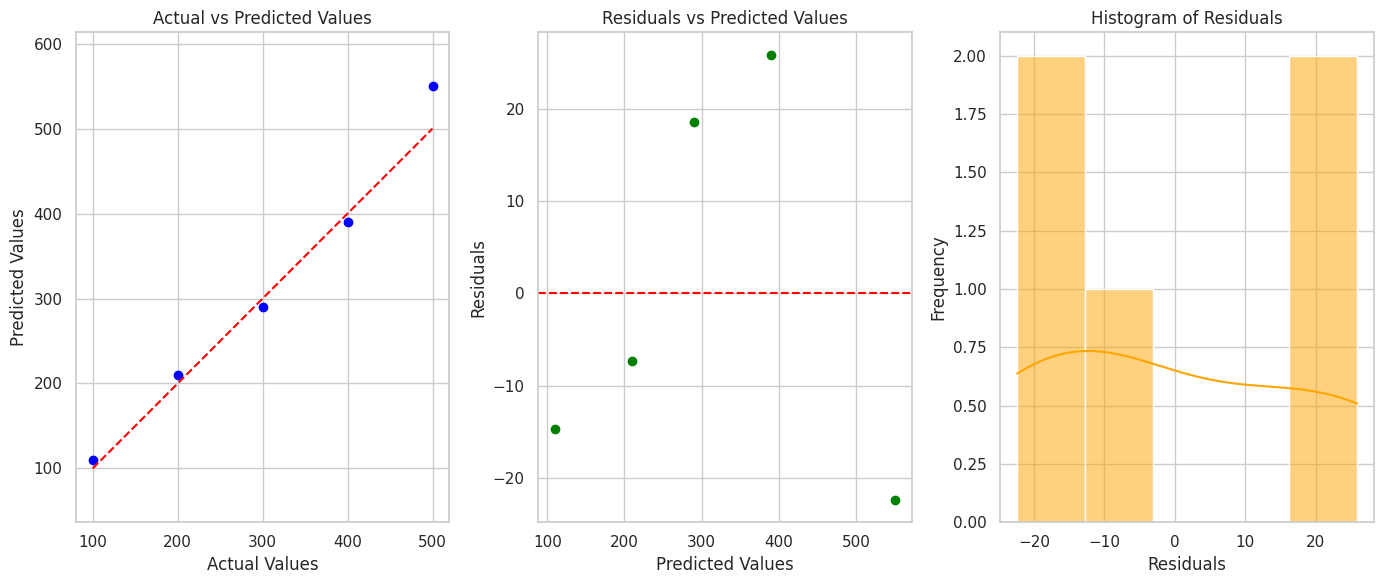

In [ ]:
import numpy as np  # Import NumPy for numerical operations
import statsmodels.api as sm  # Import Statsmodels for statistical modeling
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced visualization

# Set the style for the plots
sns.set(style="whitegrid")  # Set the style of the seaborn plots to whitegrid for better visibility

# Actual and predicted values
actual_values = np.array([100, 200, 300, 400, 500], dtype=np.float32)  # Define actual values (ground truth)
predicted_values = np.array([110, 210, 290, 390, 550], dtype=np.float32)  # Define predicted values from a model

# Add a constant for the intercept in the regression model
X = sm.add_constant(predicted_values)  # This adds a column of ones to include an intercept in the model
model = sm.OLS(actual_values, X)  # Create an Ordinary Least Squares (OLS) regression model
results = model.fit()  # Fit the model to the actual values

# Calculate residuals (the difference between actual and predicted values)
residuals = results.resid  # Extract residuals from the fitted model

# Calculate evaluation metrics
rmse = np.sqrt(np.mean(residuals ** 2))  # Calculate Root Mean Squared Error (RMSE)
mae = np.mean(np.abs(residuals))  # Calculate Mean Absolute Error (MAE)
mape = np.mean(np.abs(residuals / actual_values)) * 100  # Calculate Mean Absolute Percentage Error (MAPE)
msle = np.mean((np.log1p(actual_values) - np.log1p(predicted_values)) ** 2)  # Calculate Mean Squared Logarithmic Error (MSLE)

# Print the results of the evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")  # Print RMSE
print(f"Mean Absolute Error (MAE): {mae:.2f}")  # Print MAE
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")  # Print MAPE
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.2f}")  # Print MSLE

# Begin plotting the results
plt.figure(figsize=(14, 6))  # Set the figure size for the plots

# Scatter plot of Actual vs Predicted values
plt.subplot(1, 3, 1)  # Create a subplot (1 row, 3 columns, 1st plot)
plt.scatter(actual_values, predicted_values, color='blue')  # Plot actual vs. predicted values as blue dots
plt.plot([actual_values.min(), actual_values.max()],  # Plot a line of perfect prediction (y=x)
         [actual_values.min(), actual_values.max()],
         color='red', linestyle='--')  # Red dashed line represents ideal predictions
plt.title('Actual vs Predicted Values')  # Title of the plot
plt.xlabel('Actual Values')  # Label for the x-axis
plt.ylabel('Predicted Values')  # Label for the y-axis
plt.axis('equal')  # Ensure both axes have the same scale for accurate representation

# Residual plot
plt.subplot(1, 3, 2)  # Create a subplot (1 row, 3 columns, 2nd plot)
plt.scatter(predicted_values, residuals, color='green')  # Plot residuals against predicted values as green dots
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 (ideal residual line)
plt.title('Residuals vs Predicted Values')  # Title of the plot
plt.xlabel('Predicted Values')  # Label for the x-axis
plt.ylabel('Residuals')  # Label for the y-axis
# This plot helps visualize if residuals have any pattern. Ideally, they should be randomly scattered around zero.

# Histogram of residuals
plt.subplot(1, 3, 3)  # Create a subplot (1 row, 3 columns, 3rd plot)
sns.histplot(residuals, kde=True, color='orange', bins=5)  # Create a histogram of residuals with a Kernel Density Estimate (KDE)
plt.title('Histogram of Residuals')  # Title of the plot
plt.xlabel('Residuals')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
# This histogram shows the distribution of the residuals. Ideally, it should be bell-shaped centered around zero.

plt.tight_layout()  # Adjust the layout to prevent overlap between plots
plt.show()  # Display the plots

In [ ]:
#scikit-learn

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Actual and predicted values
actual_values = np.array([100, 200, 300, 400, 500])
predicted_values = np.array([110, 210, 290, 390, 550])

# MAPE
mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100

# RMSE
rmse = mean_squared_error(actual_values, predicted_values, squared=False)

# MSLE
msle = mean_squared_error(np.log1p(actual_values), np.log1p(predicted_values))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.2f}")

Mean Absolute Percentage Error (MAPE): 6.17%
Root Mean Squared Error (RMSE): 24.08
Mean Squared Logarithmic Error (MSLE): 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
!pip install tensorflow

In [ ]:
#tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras.metrics import MeanAbsolutePercentageError, MeanSquaredError

# Actual and predicted values
actual_values = np.array([100, 200, 300, 400, 500], dtype=np.float32)  # Change to float32
predicted_values = np.array([110, 210, 290, 390, 550], dtype=np.float32)  # Change to float32

# MAPE
mape = MeanAbsolutePercentageError()
mape.update_state(actual_values, predicted_values)
print(f"Mean Absolute Percentage Error (MAPE): {mape.result().numpy():.2f}%")

# RMSE
rmse = MeanSquaredError()
rmse.update_state(actual_values, predicted_values)
print(f"Root Mean Squared Error (RMSE): {np.sqrt(rmse.result().numpy()):.2f}")

# MSLE can be calculated similarly
def mean_squared_logarithmic_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(tf.math.log1p(y_true) - tf.math.log1p(y_pred)))

msle = mean_squared_logarithmic_error(actual_values, predicted_values)
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.2f}")


Mean Absolute Percentage Error (MAPE): 6.17%
Root Mean Squared Error (RMSE): 24.08
Mean Squared Logarithmic Error (MSLE): 0.00


In [ ]:
#Pytorch

import torch

# Actual and predicted values
actual_values = torch.tensor([100, 200, 300, 400, 500], dtype=torch.float32)
predicted_values = torch.tensor([110, 210, 290, 390, 550], dtype=torch.float32)

# MAPE
mape = (torch.mean(torch.abs((actual_values - predicted_values) / actual_values)) * 100).item()

# RMSE
rmse = torch.sqrt(torch.mean((actual_values - predicted_values) ** 2)).item()

# MSLE
msle = torch.mean((torch.log1p(actual_values) - torch.log1p(predicted_values)) ** 2).item()

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Logarithmic Error (MSLE): {msle:.2f}")

Mean Absolute Percentage Error (MAPE): 6.17%
Root Mean Squared Error (RMSE): 24.08
Mean Squared Logarithmic Error (MSLE): 0.00
